In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
elastic_net = pd.read_csv("./metrics/121_elastic_net.csv.zip")
lasso = pd.read_csv("./metrics/121_lasso.csv.zip")
linear_regression = pd.read_csv("./metrics/121_linear_regression.csv.zip")
logistic_regression = pd.read_csv("./metrics/121_logistic_regression.csv.zip")
random_forest = pd.read_csv("./metrics/121_random_forest.csv.zip")
decision_tree = pd.read_csv("./metrics/121_decision_tree.csv.zip")
mlp = pd.read_csv("./metrics/121_mlpr.csv.zip")
xgboost = pd.read_csv("./metrics/121_xgboost.csv.zip")

In [3]:
metrics = pd.concat([elastic_net,lasso,
                     linear_regression,logistic_regression,
                     random_forest,decision_tree,mlp,xgboost])

In [10]:
metrics.sort_values(by="r2",ascending=False,inplace=True)

In [11]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,9.192270e-01,2.119466e+00,1.837678e+01,4.286814e+00,2.917734e-02,41.477814,0.293715
0,XGBoost,8.708412e-01,3.428697e+00,2.938511e+01,5.420803e+00,4.772529e-02,0.521243,0.024646
0,Decision Tree,8.615056e-01,1.960485e+00,3.150907e+01,5.613294e+00,2.718958e-02,0.622115,0.007831
0,MLP,7.230146e-01,5.396753e+00,6.301735e+01,7.938347e+00,7.555950e-02,61.773264,0.029861
0,Lasso,4.540623e-01,8.380597e+00,1.242071e+02,1.114482e+01,1.210394e-01,0.106405,0.005933
0,Elastic Net,4.532291e-01,8.435179e+00,1.243966e+02,1.115332e+01,1.229331e-01,0.077452,0.005174
0,Logistic Regression,2.028245e-02,7.895602e+00,2.228969e+02,1.492973e+01,1.299271e-01,16.294864,0.017727
0,Linear Regression,-1.942344e+18,1.533032e+08,4.419055e+20,2.102155e+10,1.648421e+06,0.176752,0.008125


In [12]:
metrics.to_csv("./metrics/122_initial_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


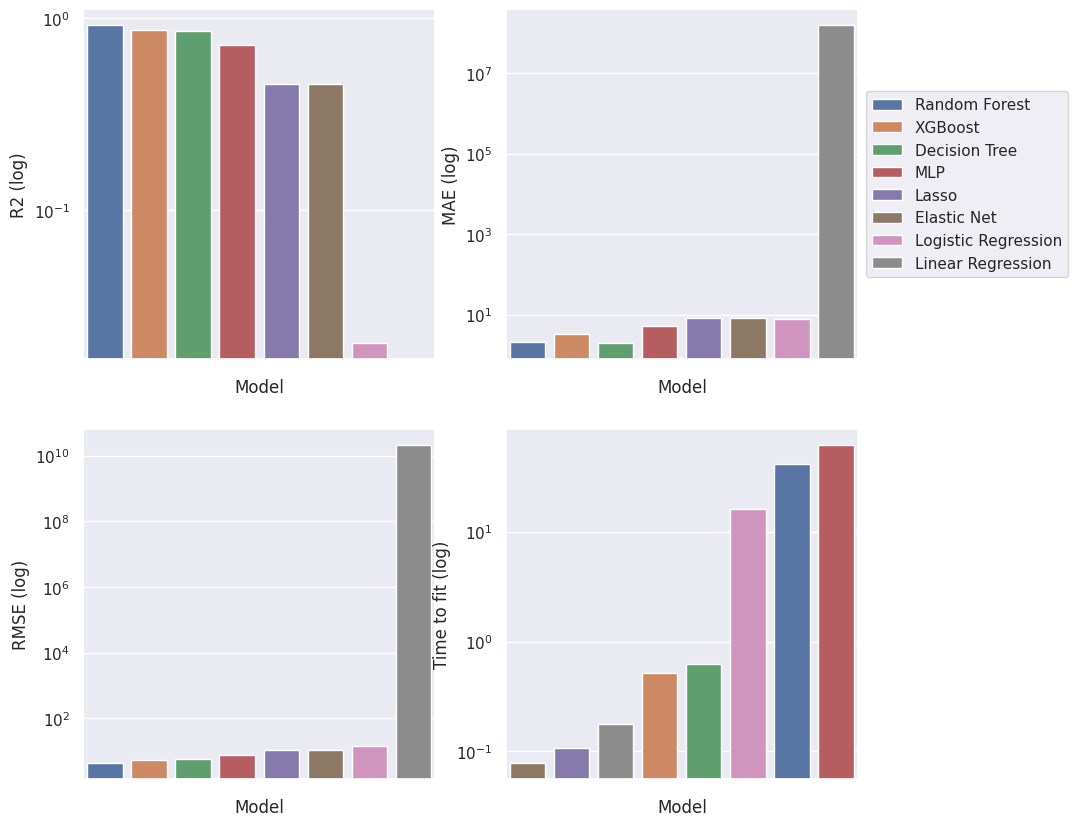

In [13]:
ttf_order = list(metrics.sort_values(by="time_to_fit")["model"])

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
# sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
# sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False,order=ttf_order)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2 (log)",yscale="log")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE (log)",yscale="log")
axes[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# axes[0, 2].set(xlabel="Model",xticklabels=[])
# axes[0, 2].set(ylabel="MSE (log)",yscale="log")
# axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE (log)",yscale="log")
axes[1, 0].get_legend().remove()

# axes[1, 1].set(xlabel="Model",xticklabels=[])
# axes[1, 1].set(ylabel="MAPE (log)",yscale="log")
# axes[1, 1].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 1].get_legend().remove()

plt.savefig("./plots/122_gardiner_flow_weather_incidents_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/122_gardiner_flow_weather_incidents_metrics.png",bbox_inches="tight")
plt.savefig("./plots/122_gardiner_flow_weather_incidents_metrics.pdf",bbox_inches="tight")